# Resampling

In [1]:
import numpy as np, matplotlib.pyplot as plt

*1. Using basic statistical properties of the variance, as well as single variable calculus, derive (5.6). In other words, prove that $\alpha$ given by (5.6) does indeed minimize $Var(\alpha X + (1 − \alpha)Y)$. See (5.6) below*

![alt text](<../images/alpha estimator.png>)

First begin by applying the variance of the sum rule to the expression $Var(\alpha X + (1 − \alpha)Y)$ for,

$$
Var(\alpha X + (1 − \alpha)Y) = Var(\alpha X) + Var((1 - \alpha)Y) + 2Cov(\alpha X, (1 - \alpha) Y) 
$$

Then by apply the basic properties of variance and covariance we can show that

$$
= \alpha ^{2}Var(X) + (1 - \alpha)^{2}Var(Y) + 2(\alpha - \alpha^{2})Cov(X,Y) 
$$

Expanding the brackets for,

$$
= \alpha ^{2}Var(X) + (1 - \alpha)^{2}Var(Y) + 2\alpha Cov(X,Y)  - 2\alpha^{2}Cov(X,Y) 
$$

Now we have an expression for the variance of the sum with all the alphas outside of another function. What we want to do now is find the alpha that minimises this expression. We can do this by differentiating the expression above - lets call it $f(\alpha)$ - with respect to alpha and then solving for alpha when the derivative is equal to 0.

$$
\frac{df(\alpha)}{d\alpha} = 2\alpha Var(X) + (2\alpha - 2)Var(Y) + 2Cov(X,Y) - 4\alpha Cov(X,Y) = 0
$$

Simplifying for 

$$
0 = \alpha(Var(X) + Var(Y) - 2Cov(X, Y)) - Var(Y) + Cov(X, Y)
$$

$$
Var(Y) - Cov(X, Y) = \alpha(Var(X) + Var(Y) - 2Cov(X, Y))
$$

$$
\alpha = \frac{Var(Y) - Cov(X, Y)}{Var(X) + Var(Y) - 2Cov(X, Y)} 
$$

*(2) We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.*

*(a) What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.*

The probability that the first bootstrap observation is not the $jth$ observation is simply $\frac{n - 1}{n}$. This is because we have n observation to choose from and all of them are equally likely to be chosen, furthermore, n-1 of these choices are not the $jth$ observation.

*(b) What is the probability that the second bootstrap observation is not the jth observation from the original sample?*

Because the bootstrap requires sampling *with replacement* this question is identical to the one above. Hence the probability and the justification is above.


*(c) Argue that the probability that the jth observation is not in the bootstrap sample is $(1 − 1/n)^{n}$.*

On each bootstrap selection the probability that the jth observation is not selected is $\frac{n - 1}{n}$ which is equivalent to $(1 − 1/n)$. Each selection is independent which means the probability of the jth observation being selected, given that it wasn't selected on the previous trial is still just $(1 − 1/n)$. If our bootstrap sample contains $n$ observations, then we will find that the probability that the jth observation is not in the bootstrap sample is, $(1 − 1/n)^{n}$. Put simply it is the probability that we do not select the jth observation n times in a row.


*(d) When $n = 5$, what is the probability that the jth observation is in the bootstrap sample?*

We know the probability of it not being in the sample from above. Therefore the probability it is in the sample is simply $1 - (1 − 1/n)^{n}$. Specfically in the context of this question we have

$$
P(jth \notin S) = 1 - (4/5)^{5} = 0.67
$$

*(d) When $n = 100$, what is the probability that the jth observation is in the bootstrap sample?*

$$
P(jth \notin S) = 1 - (99/100)^{100} = 0.63
$$

*(d) When $n = 10,000$, what is the probability that the jth observation is in the bootstrap sample?*

We know the probability of it not being in the sample from above. Therefore the probability it is in the sample is simply $1 - (1 − 1/n)^{n}$. Specfically in the context of this question we have

$$
P(jth \notin S) = 1 - (9999/10000)^{10000} = 0.63
$$

*(e) Create a plot that displays, for each integer value of n from 1 to 100, 000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.*

We see that as n increases the probability that the jth observation is in the sample converges to value close to 0.63. Formally we say,

$$
lim_{n\rightarrow \infty} 1 - (\frac{n - 1}{n}) \implies 1 - lim_{n\rightarrow \infty} (1 - \frac{1}{n}) = 1 - e^{-1} = 0.63212
$$

We can zoom in on the graph to better see the asymptote.

Text(0, 0.5, 'p')

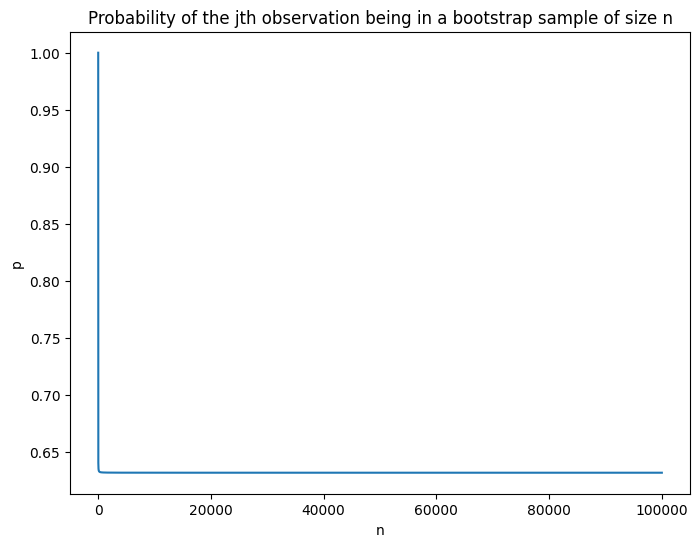

In [12]:
n = np.arange(1, 100000, 1)
p = 1 - (1 - 1/n)**n

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.plot(n, p)
ax.set_title('Probability of the jth observation being in a bootstrap sample of size n')
ax.set_xlabel('n')
ax.set_ylabel('p')



Text(0, 0.5, 'p')

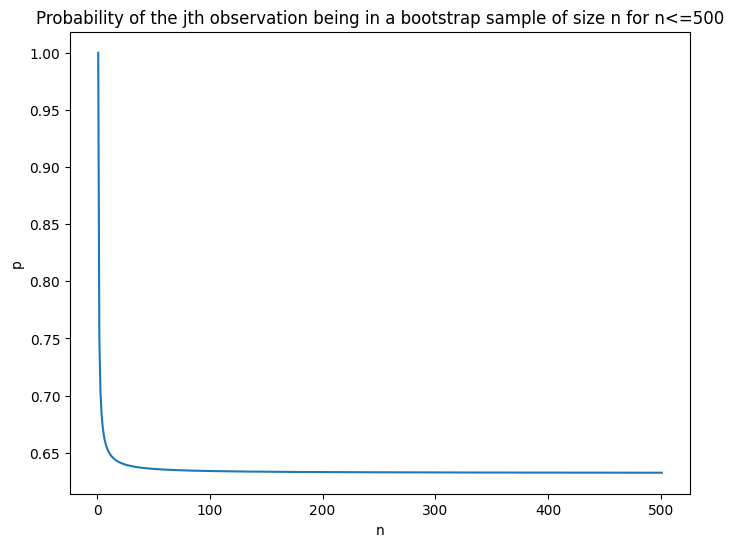

In [13]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.plot(n[:501], p[:501])
ax.set_title('Probability of the jth observation being in a bootstrap sample of size n for n<=500')
ax.set_xlabel('n')
ax.set_ylabel('p')


*(h) We will now investigate numerically the probability that a bootstrap sample of size $n = 100$ contains the jth observation. Here $j = 4$. We first create an array store with values that will subsequently be overwritten using the function `np.empty()`. We then repeatedly create bootstrap samples, and each time we record whether or not the fifth observation is contained in the bootstrap sample.*

We find that 63.62% of the bootstrap samples contain the 5th observation. This is very close to the value from the formula above which is 63.39%

In [26]:
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    store[i] = np.sum(rng.choice(100, 100, replace=True) == 4) > 0

np.mean(store)


0.6362

In [30]:
p[99]

0.6339676587267709

**3. Reviewing k-fold cross-validation**

*(a) Explain how k-fold cross-validation is implemented.*

First we split our dataset into k-folds of roughly equal sizes or if possible equal sizes. For example if n=1001 and we split the dataset into 10 folds we will have 9 datasets with 100 observations and one with 101. After we have split the data we fit iteratively fit the model on k-1 folds and then test the fit on the fold left out, recording evaluation metrics after each fit, we do this until we have tested the model on each of the k-folds. Once all folds have been used as the test fold we average the evaluation metrics we obtained at each iteration for an estimate for the true value of this metric. For example, if we were validating a linear regression model using k-fold cross-validation we might record the MSE after each fit and use the average MSE from all the fits as an estimate for the true MSE.

*(b) What are the advantages and disadvantages of k-fold crossvalidation relative to:*
* The validation set approach?
* LOOCV?

The validation set approach leaves a portion of the available data aside to be used to test or validate a model after it has been fit on the training data. The advantages of k-fold cross-validation over this approach is the estimate for the model error will have much less variance as it is the average of k estimates for this metric. That is the estimate for the model error will be very similar across multiple k-fold cross-validations (provided k is large enough) whereas for the validation set we may get wildly different estimates for the error term each time we implement it. This happens because there is less bias in the k-fold validation, it contains more of the training data for each fit, we therefore can say the expected value of the error term for k-fold cross-validation is closer to the true error term than the validation set approach.

LOOCV, or leave-one-out-cross-validation, is a special case of k-fold cross-validation where k is set equal to n. In LOOCV we train the model n times on all but one data point and then record the model error term agaisnt the left out observation. The advantage of k-fold cross-validation relative to this approach is two fold. Firstly, LOOCV can be very expensive computationally, especially if n is extremely large. Secondly, each training dataset in LOOCV will be highly positively correlated with the others (they contain all the same data bar one observation) and the mean of many correlated estimates has higher variance than the mean of less correlated estimates. WHilst LOOCV has less bias than k-fold cross validation it has more variance.

**4. Suppose that we use some statistical learning method to make a prediction for the response $Y$ for a particular value of the predictor $X$. Carefully describe how we might estimate the standard deviation of our prediction**

Firstly we create a bootstrap sample by sampling with replacement from our original dataset. We then fit our statistical learning model on the bootstrap and predict the value of the response $Y$ given the predictor vector $X$ and store this predicted value. We repeat the above process many times (say 10,000) resulting in 10,000 predictions of the response $Y$ given input $X$. The standard deviation of this dataset of predictions can be used as an estimate for the true standard deviation of our prediction.